In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv('telco.csv')
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [4]:
df = df.drop(columns=['Customer ID','Dependents','Country','State','City','Zip Code','Latitude','Longitude','Population','Quarter','Churn Category','Churn Reason','Customer Status','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue','Churn Score','CLTV','Avg Monthly Long Distance Charges','Contract','Tenure in Months','Number of Referrals'])
df

,Gender,Age,Under 30,Senior Citizen,Married,Number of Dependents,Referred a Friend,Offer,Phone Service,Multiple Lines,...,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Satisfaction Score,Churn Label
0,Male,78,No,Yes,No,0,No,NaN,No,No,...,Yes,No,No,Yes,No,No,Yes,Bank Withdrawal,3,Yes
1,Female,74,No,Yes,Yes,1,Yes,Offer E,Yes,Yes,...,No,No,No,No,No,Yes,Yes,Credit Card,3,Yes
2,Male,71,No,Yes,No,3,No,Offer D,Yes,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,Bank Withdrawal,2,Yes
3,Female,78,No,Yes,Yes,1,Yes,Offer C,Yes,No,...,Yes,No,Yes,Yes,No,Yes,Yes,Bank Withdrawal,2,Yes
4,Female,80,No,Yes,Yes,1,Yes,Offer C,Yes,Yes,...,No,No,No,No,No,Yes,Yes,Bank Withdrawal,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,No,0,No,NaN,Yes,No,...,No,No,No,No,No,No,Yes,Bank Withdrawal,5,No
7039,Male,38,No,No,Yes,2,Yes,Offer C,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Mailed Check,3,No
7040,Female,30,No,No,Yes,2,Yes,NaN,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Credit Card,4,No
7041,Female,32,No,No,Yes,2,Yes,NaN,No,No,...,No,No,No,No,No,Yes,Yes,Bank Withdrawal,4,No


In [5]:
df.isnull().sum()

Gender                        0
Age                           0
Under 30                      0
Senior Citizen                0
Married                       0
Number of Dependents          0
Referred a Friend             0
Offer                      3877
Phone Service                 0
Multiple Lines                0
Internet Service              0
Internet Type              1526
Avg Monthly GB Download       0
Online Security               0
Online Backup                 0
Device Protection Plan        0
Premium Tech Support          0
Streaming TV                  0
Streaming Movies              0
Streaming Music               0
Unlimited Data                0
Paperless Billing             0
Payment Method                0
Satisfaction Score            0
Churn Label                   0
dtype: int64

In [6]:
# Mengisi missing value pada kolom 'offer' dengan kategori baru 'No Offer'
df['Offer'].fillna('No Offer', inplace=True)

# Mengisi missing value pada kolom 'Internet type' dengan mode
mode_internet = df['Internet Type'].mode()[0]
df['Internet Type'] = df['Internet Type'].fillna(mode_internet)

In [7]:
df.iloc[:, :10]

,Gender,Age,Under 30,Senior Citizen,Married,Number of Dependents,Referred a Friend,Offer,Phone Service,Multiple Lines
0,Male,78,No,Yes,No,0,No,No Offer,No,No
1,Female,74,No,Yes,Yes,1,Yes,Offer E,Yes,Yes
2,Male,71,No,Yes,No,3,No,Offer D,Yes,Yes
3,Female,78,No,Yes,Yes,1,Yes,Offer C,Yes,No
4,Female,80,No,Yes,Yes,1,Yes,Offer C,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,No,0,No,No Offer,Yes,No
7039,Male,38,No,No,Yes,2,Yes,Offer C,Yes,Yes
7040,Female,30,No,No,Yes,2,Yes,No Offer,Yes,Yes
7041,Female,32,No,No,Yes,2,Yes,No Offer,No,No


In [8]:
df.iloc[:, 10:20]

,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music
0,Yes,DSL,8,No,No,Yes,No,No,Yes,No
1,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No
2,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes
3,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No
4,Yes,Fiber Optic,14,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
7038,No,Fiber Optic,0,No,No,No,No,No,No,No
7039,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes
7040,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes
7041,Yes,DSL,17,Yes,No,No,No,No,No,No


In [9]:
df.iloc[:, 20:27]

,Unlimited Data,Paperless Billing,Payment Method,Satisfaction Score,Churn Label
0,No,Yes,Bank Withdrawal,3,Yes
1,Yes,Yes,Credit Card,3,Yes
2,Yes,Yes,Bank Withdrawal,2,Yes
3,Yes,Yes,Bank Withdrawal,2,Yes
4,Yes,Yes,Bank Withdrawal,2,Yes
...,...,...,...,...,...
7038,No,Yes,Bank Withdrawal,5,No
7039,Yes,Yes,Mailed Check,3,No
7040,Yes,Yes,Credit Card,4,No
7041,Yes,Yes,Bank Withdrawal,4,No


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Under 30'] = label_encoder.fit_transform(df['Under 30'])
df['Senior Citizen'] = label_encoder.fit_transform(df['Senior Citizen'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Referred a Friend'] = label_encoder.fit_transform(df['Referred a Friend'])
df['Offer'] = label_encoder.fit_transform(df['Offer'])
df['Phone Service'] = label_encoder.fit_transform(df['Phone Service'])
df['Multiple Lines'] = label_encoder.fit_transform(df['Multiple Lines'])
df['Internet Service'] = label_encoder.fit_transform(df['Internet Service'])
df['Internet Type'] = label_encoder.fit_transform(df['Internet Type'])
df['Online Security'] = label_encoder.fit_transform(df['Online Security'])
df['Online Backup'] = label_encoder.fit_transform(df['Online Backup'])
df['Device Protection Plan'] = label_encoder.fit_transform(df['Device Protection Plan'])
df['Premium Tech Support'] = label_encoder.fit_transform(df['Premium Tech Support'])
df['Streaming TV'] = label_encoder.fit_transform(df['Streaming TV'])
df['Streaming Movies'] = label_encoder.fit_transform(df['Streaming Movies'])
df['Streaming Music'] = label_encoder.fit_transform(df['Streaming Music'])
df['Unlimited Data'] = label_encoder.fit_transform(df['Unlimited Data'])
df['Paperless Billing'] = label_encoder.fit_transform(df['Paperless Billing'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df['Churn Label'] = label_encoder.fit_transform(df['Churn Label'])

""" Untuk Onet Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, drop = 'first')

encoded = encoder.fit_transform(df[['Offer','Gender']])
feature_names = encoder.get_feature_names_out(['Offer','Gender'])
df = pd.DataFrame(encoded, columns = feature_names)
"""
df

,Gender,Age,Under 30,Senior Citizen,Married,Number of Dependents,Referred a Friend,Offer,Phone Service,Multiple Lines,...,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Satisfaction Score,Churn Label
0,1,78,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,3,1
1,0,74,0,1,1,1,1,5,1,1,...,0,0,0,0,0,1,1,1,3,1
2,1,71,0,1,0,3,0,4,1,1,...,0,0,1,1,1,1,1,0,2,1
3,0,78,0,1,1,1,1,3,1,0,...,1,0,1,1,0,1,1,0,2,1
4,0,80,0,1,1,1,1,3,1,1,...,0,0,0,0,0,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,30,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,5,0
7039,1,38,0,0,1,2,1,3,1,1,...,1,1,1,1,1,1,1,2,3,0
7040,0,30,0,0,1,2,1,0,1,1,...,1,0,1,1,1,1,1,1,4,0
7041,0,32,0,0,1,2,1,0,0,0,...,0,0,0,0,0,1,1,0,4,0


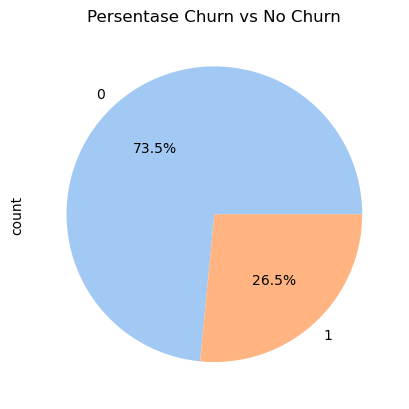

In [11]:
sns.set_palette ('pastel')
df['Churn Label'].value_counts().plot(kind= 'pie', autopct= '%1.1f%%')
plt.title ('Persentase Churn vs No Churn')
plt.show()

In [12]:
X = df.drop(columns= ['Churn Label'])
y = df['Churn Label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Distribusi kelas sebelum resampling: {Counter(y_train)}")
print(f"Distribusi kelas setelah resampling: {Counter(y_train_resampled)}")

Distribusi kelas sebelum resampling: Counter({0: 3650, 1: 1280})
Distribusi kelas setelah resampling: Counter({1: 3650, 0: 3650})


In [16]:
model_svc = SVC(class_weight='balanced', random_state=42)
model_svc.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced', random_state=42)

In [17]:
scores = cross_val_score(model_svc, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Cross-Validation Scores: [0.90205479 0.91917808 0.96917808 0.9760274  0.98150685]
Mean Accuracy: 0.9495890410958904


In [18]:
y_pred_svc = model_svc.predict(X_test_scaled)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [19]:
print("Random forest - Evaluation on Test Data")
print(classification_report(y_test,  y_pred_svc))
print(f"Akurasi: {accuracy_score(y_test,  y_pred_svc)}")

Random forest - Evaluation on Test Data
              precision    recall  f1-score   support

           0       0.99      0.72      0.84      1524
           1       0.58      0.99      0.73       589

    accuracy                           0.80      2113
   macro avg       0.79      0.85      0.78      2113
weighted avg       0.88      0.80      0.81      2113

Akurasi: 0.795551348793185


In [20]:
# Logistic Regression
model_lr = LogisticRegression(class_weight='balanced', random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = model_lr.predict(X_test_scaled)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(f"Akurasi: {accuracy_score(y_test, y_pred_lr)}")

# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = model_rf.predict(X_test_scaled)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf)}")

# Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = model_gb.predict(X_test_scaled)
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print(f"Akurasi: {accuracy_score(y_test, y_pred_gb)}")

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.19      0.32      1524
           1       0.32      1.00      0.49       589

    accuracy                           0.42      2113
   macro avg       0.66      0.59      0.40      2113
weighted avg       0.81      0.42      0.37      2113

Akurasi: 0.41504969238050166


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1524
           1       0.28      1.00      0.44       589

    accuracy                           0.28      2113
   macro avg       0.14      0.50      0.22      2113
weighted avg       0.08      0.28      0.12      2113

Akurasi: 0.27875059157595833
Gradient Boosting
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1524
           1       0.28      1.00      0.44       589

    accuracy                           0.28      2113
   macro avg       0.14      0.50      0.22      2113
weighted avg       0.08      0.28      0.12      2113

Akurasi: 0.27875059157595833


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

In [21]:
test_data = {'Gender': [1, 0, 1],
             'Age' : [40, 56, 28],
             'Under 30' : [0, 0, 1],
             'Senior Citizen' : [1, 1, 0],
             'Married' : [1, 1, 1],
             'Number of Dependents' : [3, 4, 1],
             'Referred a Friend' : [0, 1, 1],
             'Offer' : [5, 3, 1],
             'Phone Service' : [1, 1, 0],
             'Multiple Lines' : [1, 0, 1],
             'Internet Service' : [0, 1, 0],
             'Internet Type' : [0, 1, 2],
             'Avg Monthly GB Download' : [20, 12, 8],
             'Online Security' : [1, 1, 0],
             'Online Backup' : [0, 0, 0],
             'Device Protection Plan' : [0, 1, 0],
             'Premium Tech Support' : [1, 1, 1],
             'Streaming TV' : [1, 1, 0],
             'Streaming Movies' : [1, 1, 0],
             'Streaming Music' : [0, 1, 1],
             'Unlimited Data' : [1, 1, 0],
             'Paperless Billing' : [1, 1, 1],
             'Payment Method' : [1, 0 , 2],
             'Satisfaction Score' : [5, 5, 3]}

test_data = pd.DataFrame(test_data)
test_data

,Gender,Age,Under 30,Senior Citizen,Married,Number of Dependents,Referred a Friend,Offer,Phone Service,Multiple Lines,...,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Satisfaction Score
0,1,40,0,1,1,3,0,5,1,1,...,0,0,1,1,1,0,1,1,1,5
1,0,56,0,1,1,4,1,3,1,0,...,0,1,1,1,1,1,1,1,0,5
2,1,28,1,0,1,1,1,1,0,1,...,0,0,1,0,0,1,0,1,2,3


In [22]:
scaled_test_data = scaler.transform(test_data)
y_pred_new = model_svc.predict (scaled_test_data)

print ("Hasil Prediksi Model : ", y_pred_new)

Hasil Prediksi Model :  [0 0 0]


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
